In [1]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [3]:
import os

In [4]:
Sci_folder = 'gemini_gnirs_pypeit/Science/'
ls = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i and 'GNIRS' in i)
]
ls_cp = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i and not 'GNIRS' in i)
]
ls_cal = [
    i for i in os.listdir(Sci_folder)
    if ('HIP' in i and 'fits' in i and 'spec1d' in i)
]

## Standard stars

In [5]:
f = fits.open(Sci_folder+ls_cal[0])
f.info()
print(repr(f[0].header))
f.close()

Filename: gemini_gnirs_pypeit/Science/spec1d_N20200609S0043-HIP95793_GNIRS_20200609T114012.285.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   ()      
  1  OBJ0772-DET01-ORDER0008    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  OBJ0772-DET01-ORDER0007    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  OBJ0772-DET01-ORDER0006    1 BinTableHDU     83   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  OBJ0772-DET01-ORDER0005    1 BinTableHDU     85   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  5  OBJ0772-DET01-ORDER0004    1 BinTableHDU     85   1022R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1

In [6]:
output = 'HIP95793_GNIRS_coadd.fits'
#os.system('cp {} {}'.format(Sci_folder + ls_cal[0], Sci_folder + output))

0

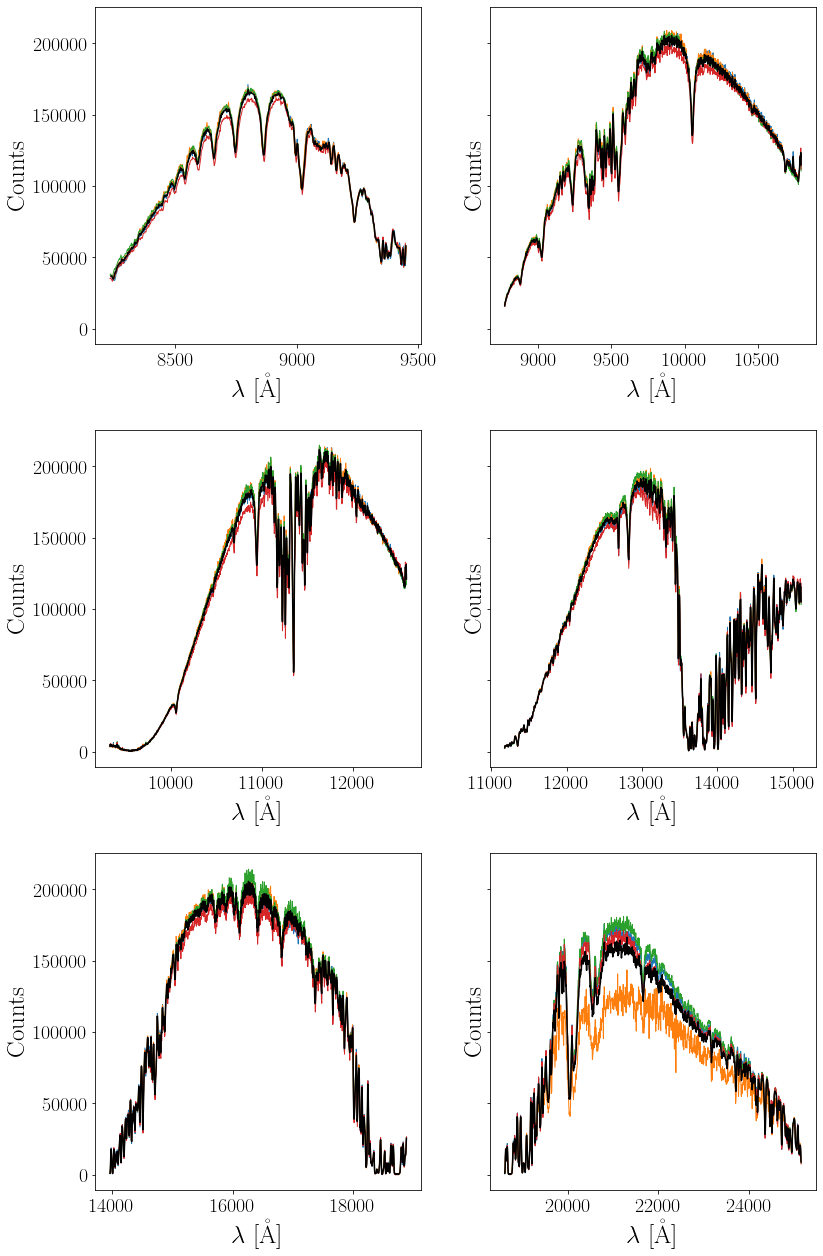

In [7]:
fig, ax = plt.subplots(3, 2, figsize=(12, 18), sharey=True)
ax = ax.flatten()
for k in np.arange(6) + 1:
    Wav = None
    Counts = None
    Mask = None
    for m, l in enumerate(ls_cal):
        f = fits.open(Sci_folder + l)
        specdata = f[k].data
        mask = specdata['OPT_MASK']
        wav = specdata['OPT_WAVE']
        counts = specdata['OPT_COUNTS']
        f.close()
        
        ###co-adding
        if m == 0:
            Wav = wav
            Counts = counts
            Mask = mask
        else:
            Wav += wav
            Counts += counts
            Mask = [i and j for (i, j) in zip(Mask, mask)]
        #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
        ax[k-1].plot(wav[mask], counts[mask], linewidth=1)
    Wav = Wav/len(ls_cal)
    Counts = Counts/len(ls_cal)
    ax[k-1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    ax[k-1].set_ylabel(r'$\mathrm{Counts}$')
    
    with fits.open(Sci_folder + output, 'update') as fout:
        fout[k].data['OPT_MASK'] = Mask
        fout[k].data['OPT_WAVE'] = Wav
        fout[k].data['OPT_COUNTS'] = Counts
        fout.flush()
        
    with fits.open(Sci_folder + output) as fout:
        mask = fout[k].data['OPT_MASK']
        wav = fout[k].data['OPT_WAVE']
        counts = fout[k].data['OPT_COUNTS']
        ax[k-1].plot(wav[mask], counts[mask], color='k')
fig.tight_layout()
plt.show()

## Sensitivity function

(numpy.record, [('SENS_WAVE', '>f8', (41979,)), ('SENS_COUNTS_PER_ANG', '>f8', (41979,)), ('SENS_ZEROPOINT', '>f8', (41979,)), ('SENS_ZEROPOINT_GPM', 'i1', (41979,)), ('SENS_ZEROPOINT_FIT', '>f8', (41979,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41979,)), ('SENS_COEFF', '>f8', (7,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])
(numpy.record, [('SENS_WAVE', '>f8', (41949,)), ('SENS_COUNTS_PER_ANG', '>f8', (41949,)), ('SENS_ZEROPOINT', '>f8', (41949,)), ('SENS_ZEROPOINT_GPM', 'i1', (41949,)), ('SENS_ZEROPOINT_FIT', '>f8', (41949,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41949,)), ('SENS_COEFF', '>f8', (7,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])
(numpy.record, [('SENS_WAVE', '>f8', (41949,)), ('SENS_COUNTS_PER_ANG', '>f8', (41949,)), ('SENS_ZEROPOINT', '>f8', (41949,)), ('SENS_ZEROPOINT_GPM', 'i1', (41949,)), ('SENS_ZEROPOINT_FIT', '>f8', (41949,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (41949,)), ('

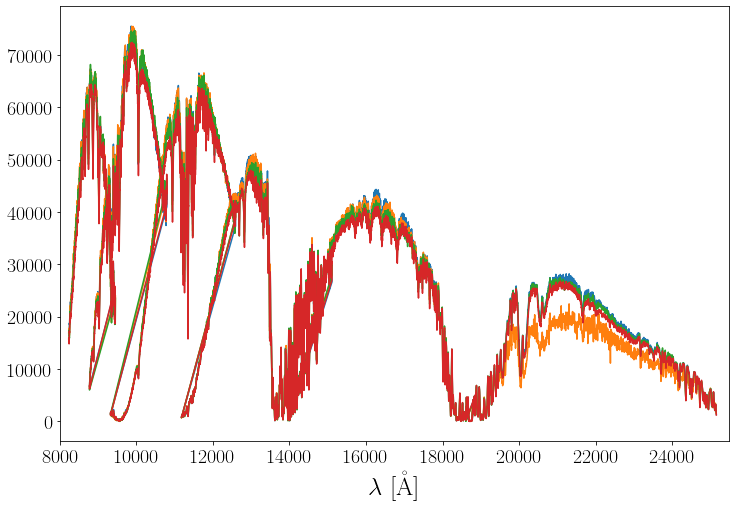

In [8]:
Flux_folder = 'gemini_gnirs_pypeit/Fluxing/'
Wav = []
S = []
plt.figure(figsize=(12, 8))
for i in np.arange(41, 45):
    f = fits.open(Flux_folder + 'sens_HIP95793_{}.fits'.format(i))
    #print(f.info())
    sens = f[2].data
    print(sens.dtype)
    wav = np.array(sens['SENS_WAVE'])
    s = sens['SENS_COUNTS_PER_ANG']
    S.append(s)
    plt.plot(wav[wav!=0], s[wav!=0])
    Wav.append(sens['SENS_WAVE'])
    plt.xlim(8000, 25500)
    plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    #plt.show()
    f.close()
#Wav = np.mean(Wav, axis=0)
#S = np.mean(S, axis=1)
#Wav.shape

## Calibrated spectrum for each exposure

Standard star: HIP95793
- Spectral type: $A_0$
- $M_V=5.783$

spec1d_16-SN2020jgb.fits


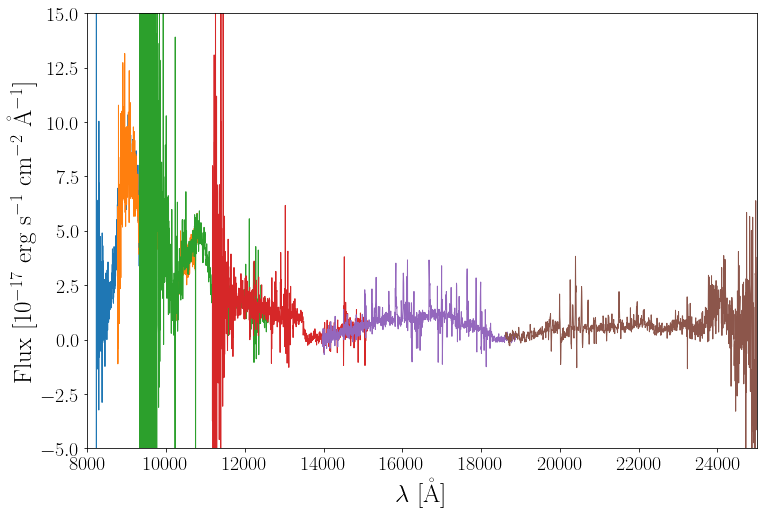

spec1d_11-SN2020jgb.fits


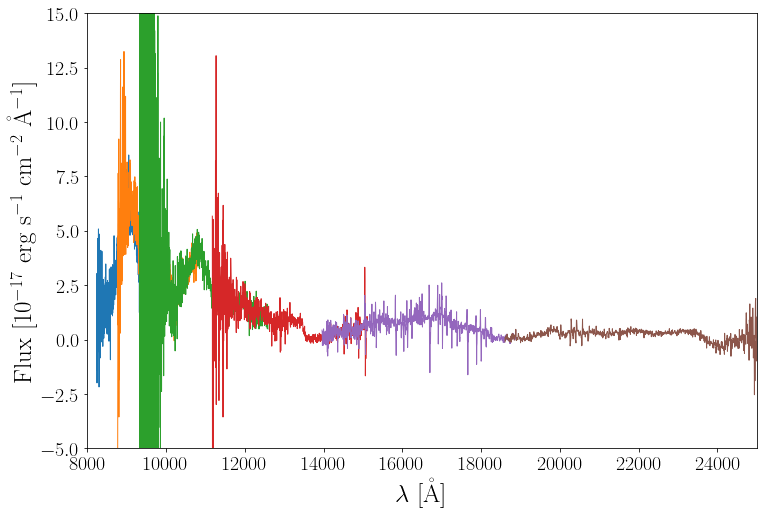

spec1d_18-SN2020jgb.fits


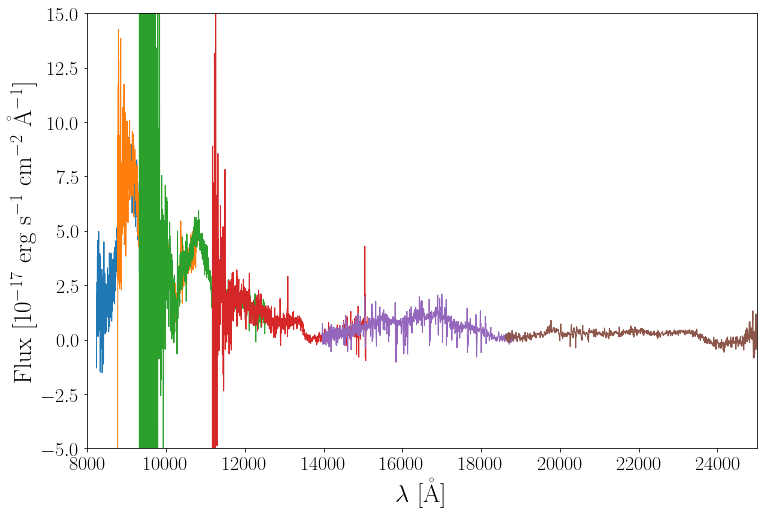

spec1d_17-SN2020jgb.fits


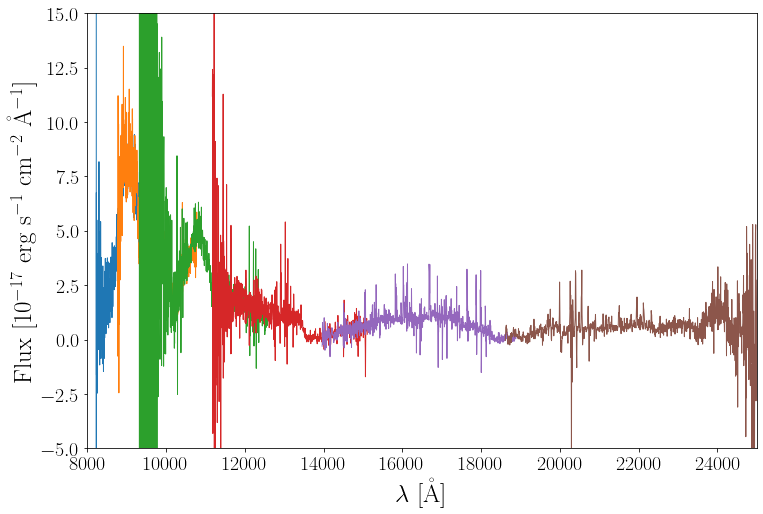

spec1d_15-SN2020jgb.fits


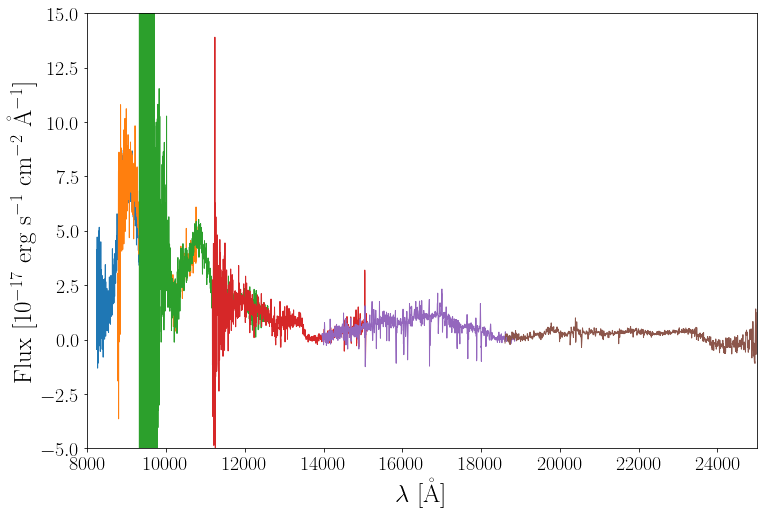

spec1d_12-SN2020jgb.fits


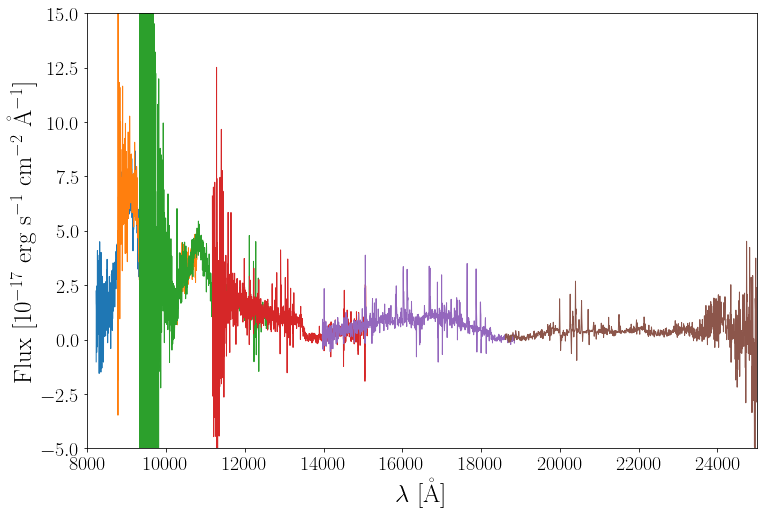

spec1d_13-SN2020jgb.fits


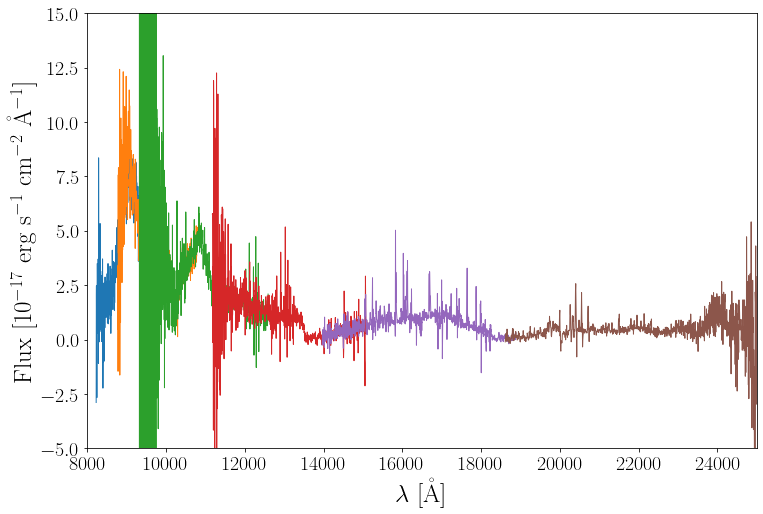

spec1d_14-SN2020jgb.fits


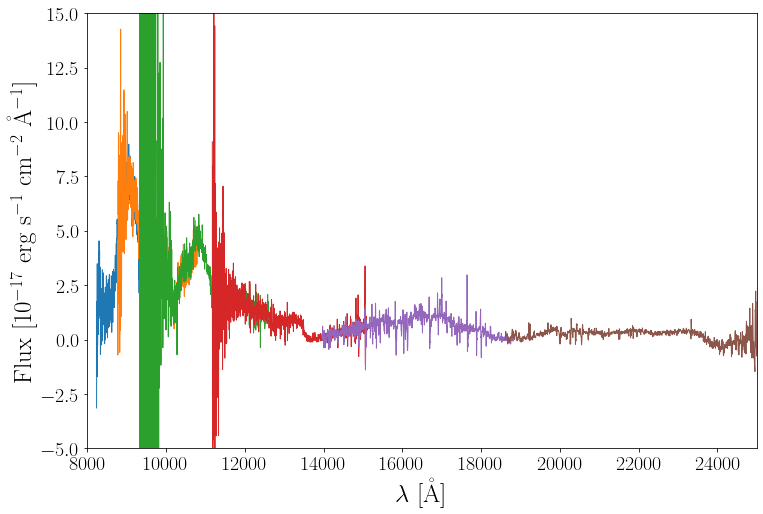

In [9]:
for m, l in enumerate(ls_cp):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(6) + 1:
        f = fits.open(Sci_folder + l)
        if len(f) > 8:
            specdata = f[k + 6].data
        else:
            specdata = f[k].data
        wav = specdata['OPT_WAVE']
        #print(specdata)
        flux = specdata['OPT_FLAM']
        f.close()
        plt.plot(wav[wav > 8200], flux[wav > 8200], linewidth=1)
        plt.xlim(8000, 25000)
        plt.ylim(-5, 15)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

## Coadding

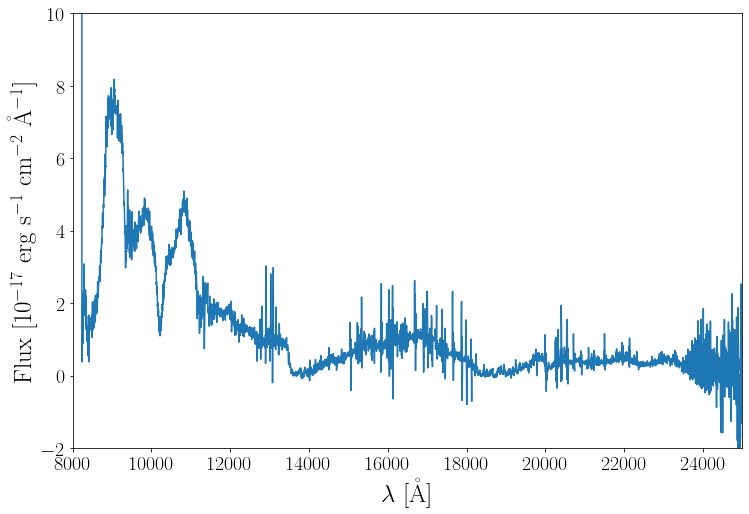

In [10]:
Coadd_folder = 'gemini_gnirs_pypeit/Coadding/'
f = fits.open(Coadd_folder + 'SN2020jgb_coadd.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
f.close()
plt.plot(wav, flux)
plt.xlim(8000, 25000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
f.close()

## Telluric correction

In [11]:
def data_binning(x, y, bins=5):
    N = len(x) // bins
    X, Y = [], []
    for i in range(N):
        X = np.append(X, x[bins*i:bins*(i+1)].mean())
        Y = np.append(Y, y[bins*i:bins*(i+1)].mean())
    return (X, Y)

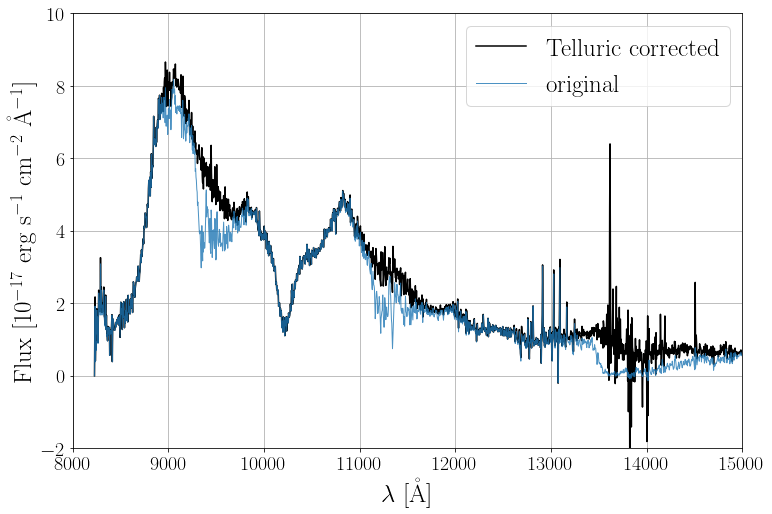

In [12]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
plt.plot(wav,
         flux,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.plot(model[0]['WAVE'],
         flux * model[0]['TELLURIC'],
         linewidth=1,
         alpha=0.8,
         label=r'$\mathrm{original}$')
plt.xlim(8000, 15000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

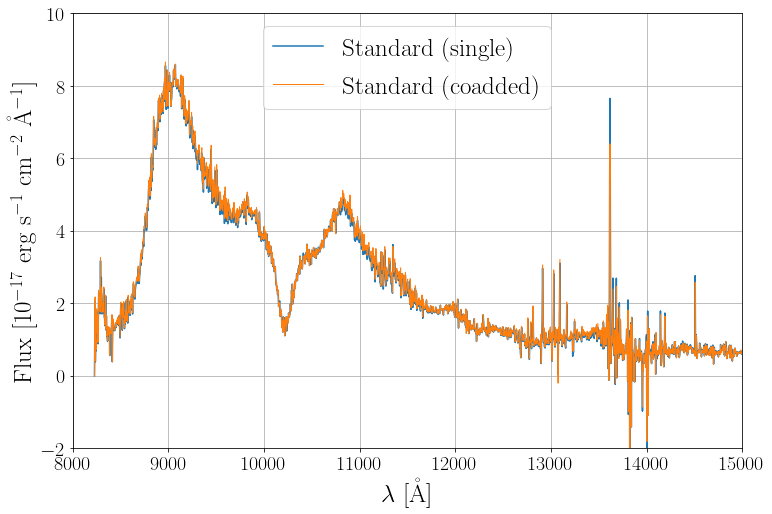

In [13]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_1_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
plt.figure(figsize=(12, 8))
wav1 = specdata['wave']
flux1 = specdata['flux']
wav2 = model['wave']
flux2 = model['flux']
plt.plot(wav1,
         flux1,
         label=r'$\mathrm{Standard\ (single)}$')
plt.plot(wav2,
         flux2,
         linewidth=1,
         label=r'$\mathrm{Standard\ (coadded)}$')
plt.xlim(8000, 15000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

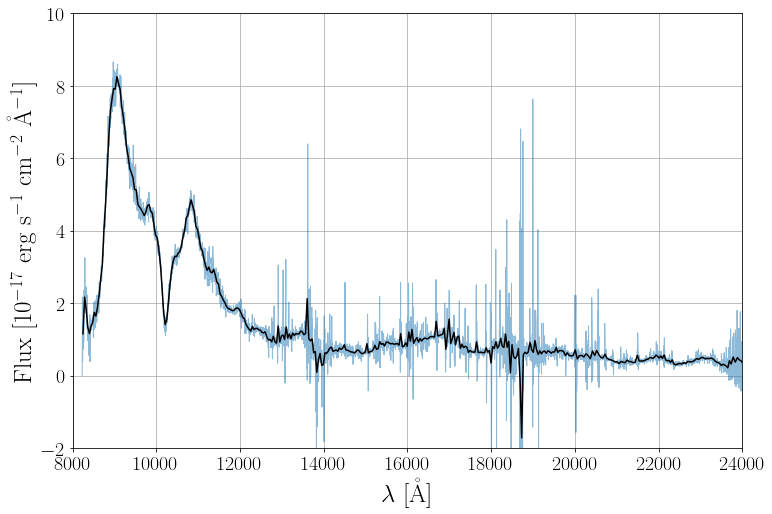

In [14]:
Tell_folder = 'gemini_gnirs_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_coadd_tellcorr.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
plt.plot(wav, flux, linewidth=1, alpha=0.5)
wav2, flux2 = data_binning(wav, flux, bins=10)
plt.plot(wav2, flux2, color='k')
plt.xlim(8000, 24000)
plt.ylim(-2, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.grid()
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()